In [156]:
import random
import pandas as pd
import numpy as np
import scipy.stats as stats
%matplotlib inline
import matplotlib.pyplot as plt

# const
BINS = 20

# helper functions
def dice_roll(size):
    """ roll the d6, duh! """
    result = []
    for _ in range(size):
        result.append(random.randint(1,6))
    return result

def compute_bins(n_bins, input_df, target_column):
    """ compute the data slices for every bin """
    d = {}
    step = (max(input_df[target_column]) - min(input_df[target_column])) / n_bins
    for i in range(n_bins+1):
        d[i+1] = (round(min(input_df[target_column]) + i*step, 2), 
                  round(min(input_df[target_column]) + (i+1)*step, 2))
    return d


def in_range(inp, range):
    """ helper float comparison """
    return inp >= range[0] and inp < range[1]

def prepare_frequency_table(n_bins, df, target, value_mapper):
    count = []
    for i in range(1, n_bins+1):
        count.append(df[target][df[target].apply(lambda x: in_range(x, value_mapper[i]))].count())
    data = {'bin_number': [i for i in range(1, n_bins+1)], 
            'value': [value_mapper[i] for i in range(1, n_bins+1)],
            'count': count}
    return pd.DataFrame.from_dict(data)

def gen_studet(degree_freedom, size):
    return pd.DataFrame({'observation': np.random.standard_t(degree_freedom, size=size)})

def gen_binom(n, p):
    return pd.DataFrame({'observation': np.random.binomial(n, p, 10000)})
    
def gen_weibull(alpha):
    # shape > 1 -> p increases, < 1 -> decreases
    return pd.DataFrame({'observation': np.random.weibull(alpha, 10000)})

def gen_poisson(l, size):
    return pd.DataFrame({'observation':np.random.poisson(l, size)})

def gen_exp(l):
    return pd.DataFrame({'observation': np.random.exponential(scale=1 / l, size=10000)}) 

def gen_normal(m, sigma, size):
    return pd.DataFrame({'observation':np.random.normal(m, sigma, size)})

def generate_distribution(name):
    """ generate df from random.distribution of a defined type """
    if name == "normal":
        return gen_normal(0.0, 1.0, 10000)
    elif name == "binom":
        return gen_binom(10, 0.5)
    elif name == "poisson":
        return gen_poisson(2.5, 100)
    elif name == "exp":
        # beta  = frequency over frame. lambda - rate of event per interal
        return gen_exp(0.2)
    elif name == "student":
        return gen_studet(5, 10000)
    elif name == "weibull":
        return gen_weibull(5.0)
    else:
        return pd.DataFrame({'observation': []})
    


# Why is knowledge of a distribution important?
            1. Proper outliers handling
            2. Correct hypothesis creation 
            3. Better model fit (sepcialisation/generalisation)
            4. Realisitic tests
            
            
### TODO: what does it mean to identify distribution?
### Why is it important for an industry. (Hypothesis testing -> 95, 99%)

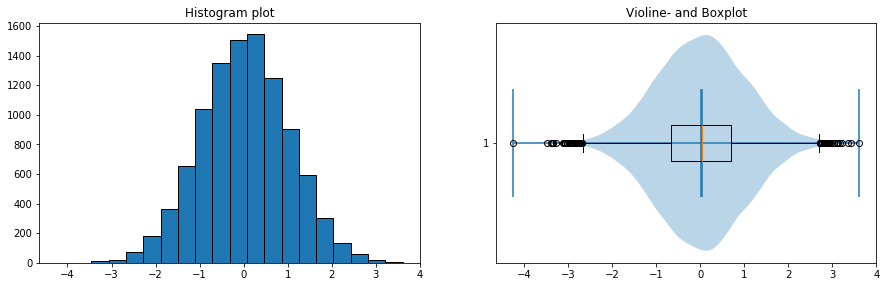

In [157]:
# Wouldn't it be great, if everyting was normally distributed?
normal = generate_distribution('normal')['observation']
fig = plt.figure(figsize=(15, 15)) 
plt.subplot(321)
plt.title("Histogram plot")
plt.hist(normal, bins=BINS, edgecolor='k')
plt.subplot(322)
plt.title("Violine- and Boxplot")
plt.violinplot(normal, vert=False, widths=0.9, showmeans=True, showextrema=True, showmedians=True)
# plt.subplot(323)  # have them in different colors or differenbt plots?
plt.boxplot(normal,vert=False)
plt.show()
# TODO: add axis labels

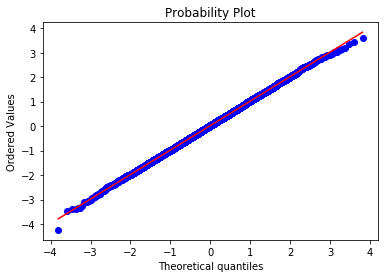

In [158]:
# A Q-Q plot stands for a "quantile-quantile plot".
# It is a plot where the axes are purposely transformed in order to make a normal (or Gaussian) distribution a
# ppear in a straight line. 
# In other words, a perfectly normal distribution would exactly follow a line with slope = 1 and intercept = 0.
# Therefore, if the plot does not appear to be - roughly - a straight line, 
# then the underlying distribution is not normal. 
# If it bends up, then there are more "high flyer" values than expected, for instance. 
qq = stats.probplot(normal, plot=plt)

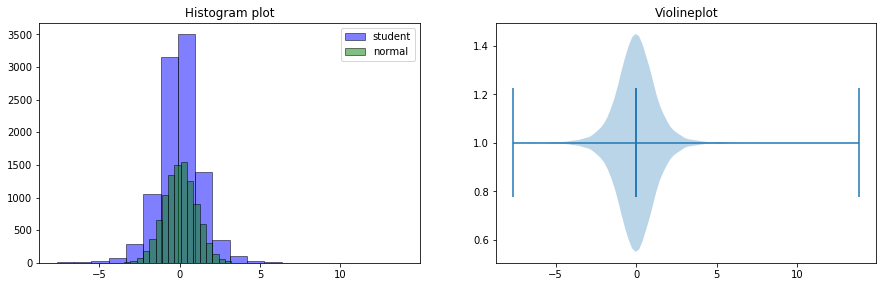

In [159]:
# Students distribution - approximation for 
student = generate_distribution('student')['observation']
fig = plt.figure(figsize=(15, 15)) 
plt.subplot(321)
plt.title("Histogram plot")
plt.hist(student, bins=BINS, alpha=0.5, label='student', color='b', edgecolor='k')
plt.hist(normal, bins=BINS, alpha=0.5, label='normal', color='g', edgecolor='k')
plt.gca().legend(('student','normal'))
plt.subplot(322)
plt.title("Violineplot")
plt.violinplot(student, vert=False, widths=0.9, showmeans=True, showextrema=True, showmedians=True)
plt.show()

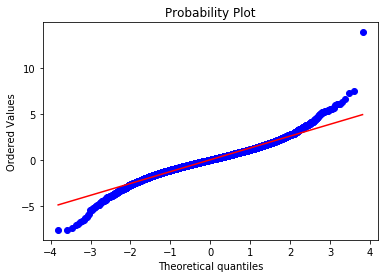

In [160]:
qq = stats.probplot(student, plot=plt)

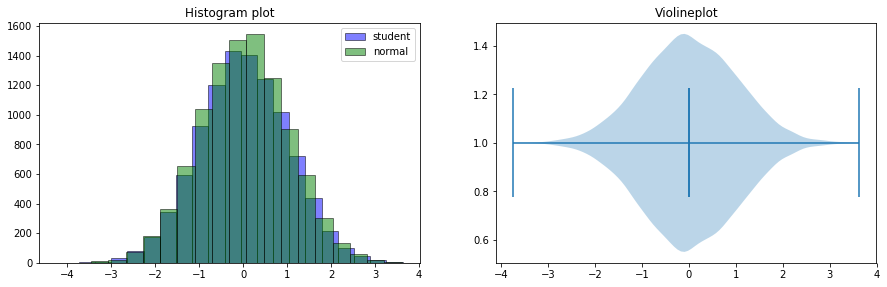

In [161]:
student_norm = gen_studet(100, 10000)['observation']
fig = plt.figure(figsize=(15, 15)) 
plt.subplot(321)
plt.title("Histogram plot")
plt.hist(student_norm, bins=BINS, alpha=0.5, label='student', color='b', edgecolor='k')
plt.hist(normal, bins=BINS, alpha=0.5, label='normal', color='g', edgecolor='k')
plt.gca().legend(('student','normal'))
plt.subplot(322)
plt.title("Violineplot")
plt.violinplot(student_norm, vert=False, widths=0.9, showmeans=True, showextrema=True, showmedians=True)
plt.show()

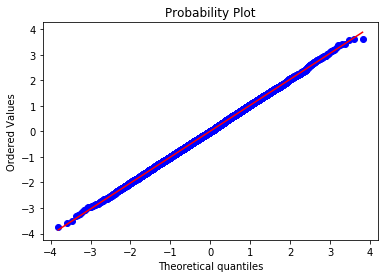

In [162]:
qq = stats.probplot(student_norm, plot=plt)

In [163]:
# Binomial distribution with parameters n and p 
# is the discrete probability distribution of the number 
# of successes in a sequence of n independent experiments.
# p = 1, 1-p = 0
# wiki: https://en.wikipedia.org/wiki/Binomial_distribution

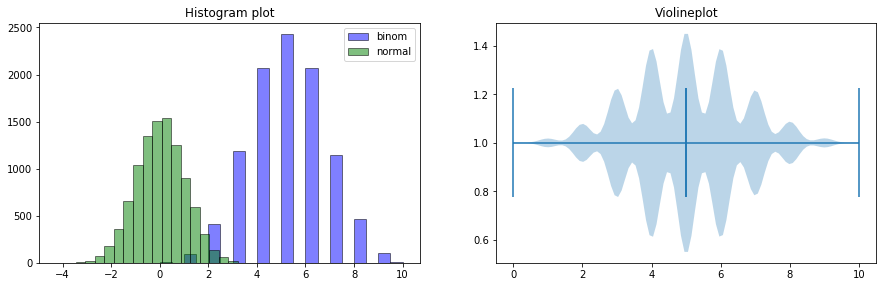

In [164]:
binom = generate_distribution('binom')['observation']
fig = plt.figure(figsize=(15, 15)) 
plt.subplot(321)
plt.title("Histogram plot")
plt.hist(binom, bins=BINS, alpha=0.5, label='binomial', color='b', edgecolor='k')
plt.hist(normal, bins=BINS, alpha=0.5, label='normal', color='g', edgecolor='k')
plt.gca().legend(('binom','normal'))
plt.subplot(322)
plt.title("Violineplot")
plt.violinplot(binom, vert=False, widths=0.9, showmeans=True, showextrema=True, showmedians=True)
plt.show()

In [165]:
# more of a humanly understandable exaplanation
from collections import Counter
c = Counter(binom)
keys = sorted([i for i in c])
for k in keys:
    print("{}:{}".format(k, c[k]))

0:11
1:95
2:415
3:1188
4:2073
5:2426
6:2070
7:1150
8:463
9:99
10:10


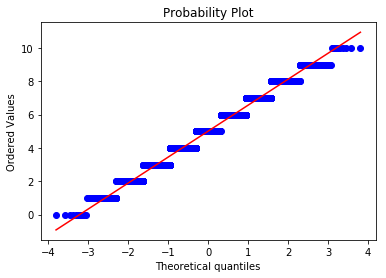

In [166]:
qq = stats.probplot(binom, plot=plt)

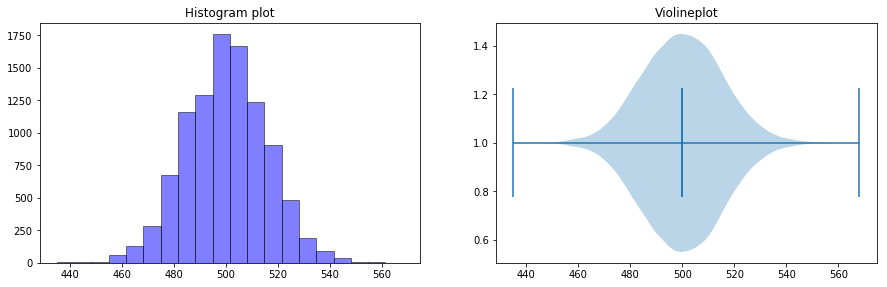

In [167]:
binom_normal = gen_binom(1000, 0.5)['observation']
fig = plt.figure(figsize=(15, 15)) 
plt.subplot(321)
plt.title("Histogram plot")
plt.hist(binom_normal, bins=BINS, alpha=0.5, label='binomial', color='b', edgecolor='k')
plt.subplot(322)
plt.title("Violineplot")
plt.violinplot(binom_normal, vert=False, widths=0.9, showmeans=True, showextrema=True, showmedians=True)
plt.show()

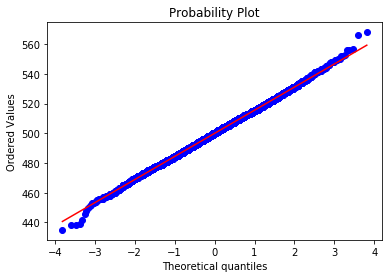

In [168]:
qq = stats.probplot(binom_normal, plot=plt)

In [169]:
# Poisson - probability of a given number of events occurring in a fixed interval of time or space. 
# Lambda = variance (mean nuber of events in a specified interval)

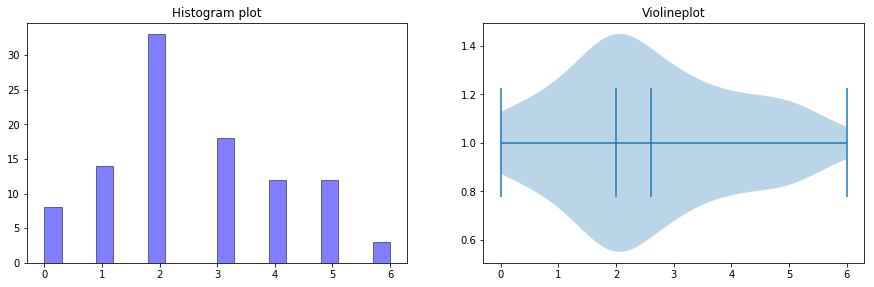

In [170]:
poisson = generate_distribution('poisson')['observation']
fig = plt.figure(figsize=(15, 15)) 
plt.subplot(321)
plt.title("Histogram plot")
plt.hist(poisson, bins=BINS, alpha=0.5, label='poisson', color='b', edgecolor='k')
plt.subplot(322)
plt.title("Violineplot")
plt.violinplot(poisson, vert=False, widths=0.9, showmeans=True, showextrema=True, showmedians=True)
plt.show()

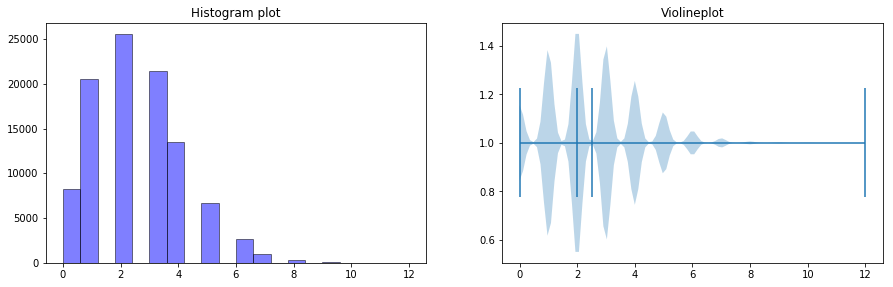

In [171]:
poisson_bigger = gen_poisson(2.5, 100000)['observation']
fig = plt.figure(figsize=(15, 15)) 
plt.subplot(321)
plt.title("Histogram plot")
plt.hist(poisson_bigger, bins=BINS, alpha=0.5, label='poisson', color='b', edgecolor='k')
# plt.hist(normal, bins=BINS, alpha=0.5, label='normal', color='g', edgecolor='k')
# plt.gca().legend(('poisson','normal'))
plt.subplot(322)
plt.title("Violineplot")
plt.violinplot(poisson_bigger, vert=False, widths=0.9, showmeans=True, showextrema=True, showmedians=True)
plt.show()

In [172]:
# is the probability distribution that describes the time between events in a Poisson point process,

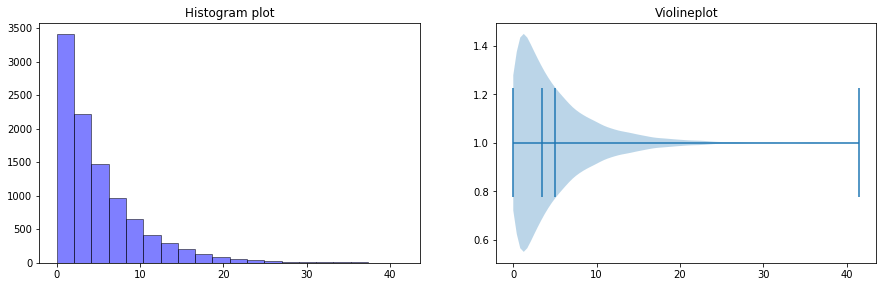

In [173]:
exp = generate_distribution('exp')['observation']
fig = plt.figure(figsize=(15, 15)) 
plt.subplot(321)
plt.title("Histogram plot")
plt.hist(exp, bins=BINS, alpha=0.5, label='exponential', color='b', edgecolor='k')
plt.subplot(322)
plt.title("Violineplot")
plt.violinplot(exp, vert=False, widths=0.9, showmeans=True, showextrema=True, showmedians=True)
plt.show()

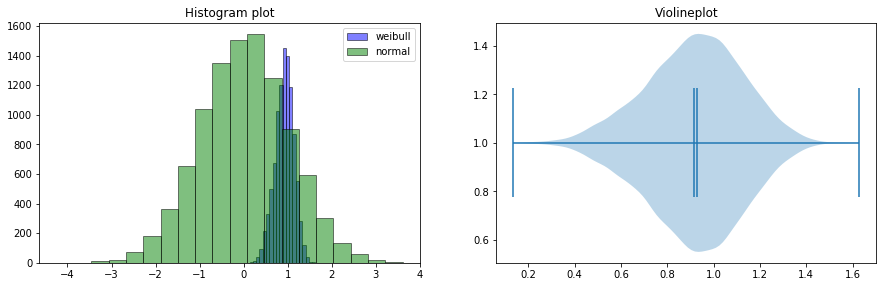

In [174]:
# Weibull distribution. Variant of Poisson/Exponential. The event frequency might change 
weibull = generate_distribution('weibull')['observation']
fig = plt.figure(figsize=(15, 15)) 
plt.subplot(321)
plt.title("Histogram plot")
plt.hist(weibull, bins=BINS, alpha=0.5, label='weibull', color='b', edgecolor='k')
plt.hist(normal, bins=BINS, alpha=0.5, label='normal', color='g', edgecolor='k')
plt.gca().legend(('weibull','normal'))
plt.subplot(322)
plt.title("Violineplot")
plt.violinplot(weibull, vert=False, widths=0.9, showmeans=True, showextrema=True, showmedians=True)
plt.show()

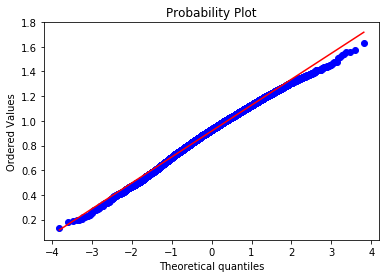

In [175]:
qq = stats.probplot(weibull, plot=plt)

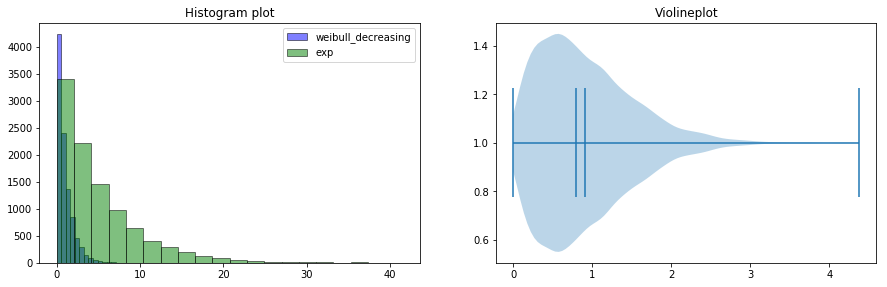

In [176]:
weibull_exp = gen_weibull(1)['observation']
fig = plt.figure(figsize=(15, 15)) 
plt.subplot(321)
plt.title("Histogram plot")
plt.hist(weibull_exp, bins=BINS, alpha=0.5, label='weibull', color='b', edgecolor='k')
plt.hist(exp, bins=BINS, alpha=0.5, label='normal', color='g', edgecolor='k')
plt.gca().legend(('weibull_decreasing','exp'))
plt.subplot(322)
plt.title("Violineplot")
plt.violinplot(weibull_decreasing, vert=False, widths=0.9, showmeans=True, showextrema=True, showmedians=True)
plt.show()

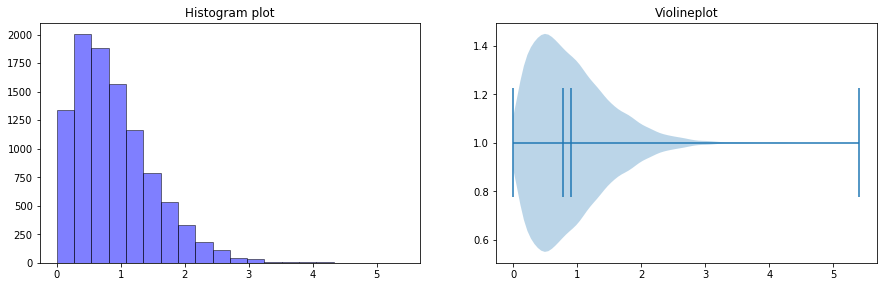

In [177]:
weibull_decreasing = gen_weibull(1.5)['observation']
fig = plt.figure(figsize=(15, 15)) 
plt.subplot(321)
plt.title("Histogram plot")
plt.hist(weibull_decreasing, bins=BINS, alpha=0.5, label='weibull', color='b', edgecolor='k')
# plt.hist(normal, bins=BINS, alpha=0.5, label='normal', color='g', edgecolor='k')
# plt.gca().legend(('weibull_middle','normal'))
plt.subplot(322)
plt.title("Violineplot")
plt.violinplot(weibull_decreasing, vert=False, widths=0.9, showmeans=True, showextrema=True, showmedians=True)
plt.show()

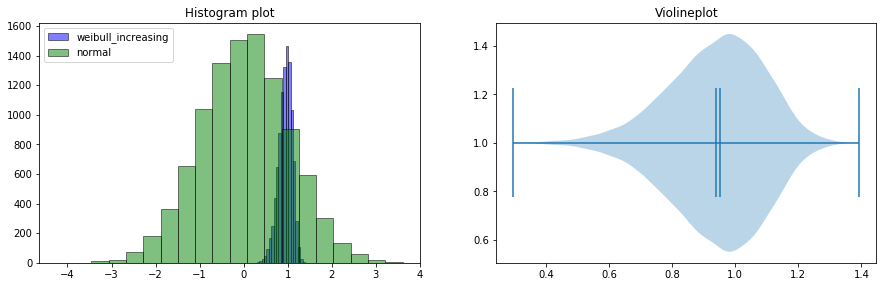

In [178]:
weibull_increasing = gen_weibull(7.1)['observation']
fig = plt.figure(figsize=(15, 15)) 
plt.subplot(321)
plt.title("Histogram plot")
plt.hist(weibull_increasing, bins=BINS, alpha=0.5, label='weibull', color='b', edgecolor='k')
plt.hist(normal, bins=BINS, alpha=0.5, label='normal', color='g', edgecolor='k')
plt.gca().legend(('weibull_increasing','normal'))
plt.subplot(322)
plt.title("Violineplot")
plt.violinplot(weibull_increasing, vert=False, widths=0.9, showmeans=True, showextrema=True, showmedians=True)
plt.show()

#### Useful links
1. distribution list: https://en.wikipedia.org/wiki/List_of_probability_distributions 
2. statistical moments overview: https://codeburst.io/2-important-statistics-terms-you-need-to-know-in-data-science-skewness-and-kurtosis-388fef94eeaa
3. short visualiozation: https://tekmarathon.com/2015/11/13/importance-of-data-distribution-in-training-machine-learning-models/
4. qqplot: https://en.wikipedia.org/wiki/Q%E2%80%93Q_plot
5. recap: https://www.analyticsvidhya.com/blog/2017/09/6-probability-distributions-data-science/

In [193]:
# Tasks: 
data1 = pd.read_csv('data/StudentsPerformance.csv')
what_is_this_distirution_1 = data1["math score"]
what_is_this_distirution_1.head()
mu = np.mean(what_is_this_distirution_1)
sigma = np.std(what_is_this_distirution_1)
what_is_this_distirution_1_normalized = what_is_this_distirution_1.apply(lambda x: (x - mu)/sigma)
# Try to plot hist, compute mean and sigma - normilize, plot normal, violine, qq -> decide on appropriate one

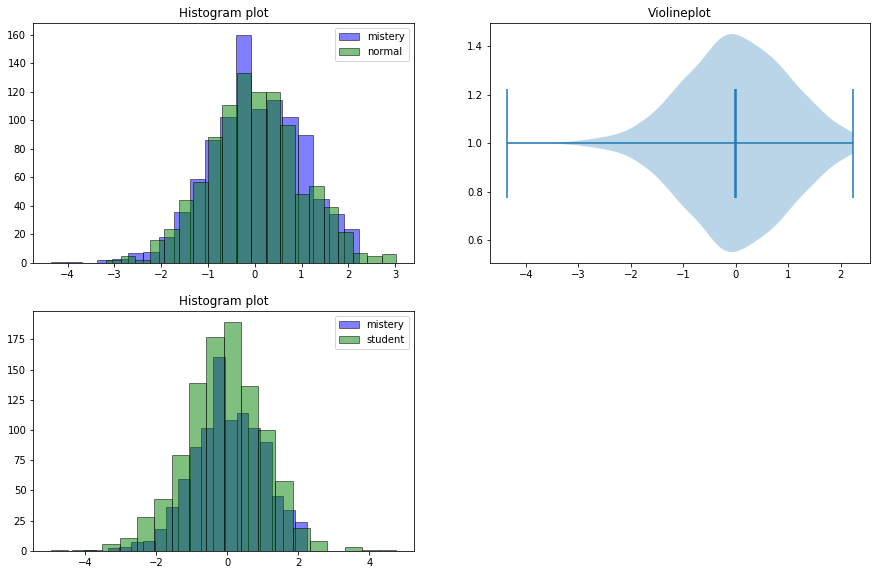

In [197]:
fig = plt.figure(figsize=(15, 15)) 
plt.subplot(321)
plt.title("Histogram plot")
plt.hist(what_is_this_distirution_1_normalized, bins=BINS, alpha=0.5, label='poisson', color='b', edgecolor='k')
plt.hist(gen_normal(0, 1, 1000)['observation'], bins=BINS, alpha=0.5, label='normal', color='g', edgecolor='k')
plt.gca().legend(('mistery','normal'))
plt.subplot(322)
plt.title("Violineplot")
plt.violinplot(what_is_this_distirution_1_normalized, vert=False, widths=0.9, showmeans=True, showextrema=True, showmedians=True)
plt.subplot(323)
plt.title("Histogram plot")
plt.hist(what_is_this_distirution_1_normalized, bins=BINS, alpha=0.5, label='poisson', color='b', edgecolor='k')
plt.hist(gen_studet(10, 1000)['observation'], bins=BINS, alpha=0.5, label='normal', color='g', edgecolor='k')
plt.gca().legend(('mistery','student'))
plt.show()

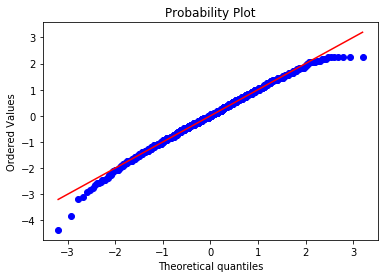

In [196]:
qq = stats.probplot(what_is_this_distirution_1, plot=plt)

In [199]:
data2 = pd.read_csv('data/StudentsPerformance.csv')['writing score']
data3 = pd.read_csv('data/open-data-website-traffic.csv')['Socrata Sessions']
data4 = pd.read_csv('data/open-data-website-traffic.csv')['Socrata Bounce Rate']
# data5 = pd.read_csv('data/StudentsPerformance.csv')['writing score']


### used data links:
1. https://www.kaggle.com/venky73/predicting-student-percentage/data
2. https://www.kaggle.com/cityofLA/los-angeles-open-data-website-traffic